<a href="https://colab.research.google.com/github/Rakeshshivakumar/Data-structures/blob/main/AML_LAB_ASSIGNMENT_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download iris dataset form UCI machine learning repository and use the dataset to develop the following classifiers and find the accuracy of the model. Compare and comment on the results:**

# Part-1:

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')





In [ ]:
data=pd.read_csv("Iris.csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = pd.DataFrame(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
X =data.iloc[:,1:5].values  # X is a matrix
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_gini.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_gini = classifier_gini.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm ,'\n')
prediction = accuracy_score(y_test, y_pred)
print(prediction * 100)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]] 

97.36842105263158


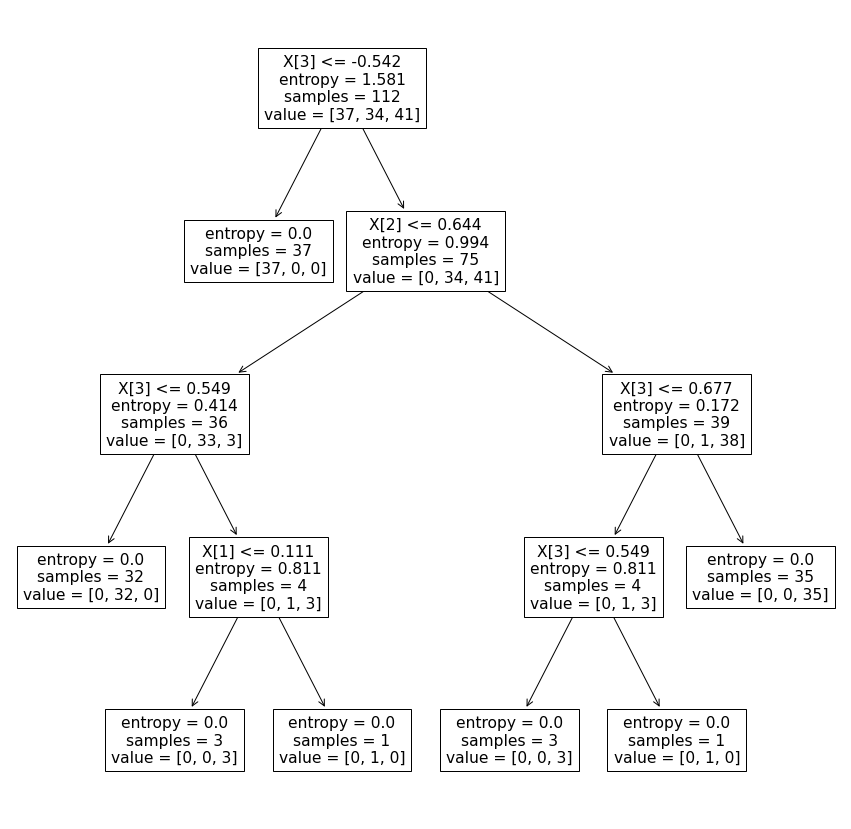

In [ ]:
from sklearn import tree
plt.figure(figsize = (15, 15))
tree.plot_tree(classifier);

In [ ]:
accuracyentropy=accuracy_score(y_test, y_pred)
accuracyentropy

0.9736842105263158

# 2.Naïve Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_nb = accuracy_score(y_test,y_pred)*100
acc_nb = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_nb)
print(acc_nb)


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
100.0
100.0


# 3.Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_lr = accuracy_score(y_test,y_pred)*100
acc_lr = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_lr)
print(acc_lr)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
97.36842105263158
97.36842105263158


# 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test,y_pred)*100
acc_knn = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_knn)
print(acc_knn)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
97.36842105263158
97.36842105263158


#5.Logistic Regression model and apply PAC

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train_pca, y_train)
# print metric to get performance
y_pred = model.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
accuracy_lrpca = accuracy_score(y_test,y_pred)*100
acc_lrpca = model.score(X_test_pca, y_test) * 100
print(cm)
print(accuracy_lrpca)
print(acc_lrpca)

[[13  0  0]
 [ 0 12  4]
 [ 0  2  7]]
84.21052631578947
84.21052631578947


#6. SVM – linear and non-linear classifiers

In [ ]:
#SVM-LINEAR
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_svml = accuracy_score(y_test,y_pred)*100
acc_svml = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_svml)
print(acc_svml)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
97.36842105263158
97.36842105263158


In [ ]:
#SVM-NON-LINEAR
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_svmNl = accuracy_score(y_test,y_pred)*100
acc_svmNl = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_svmNl)
print(acc_svmNl)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
97.36842105263158
97.36842105263158


# 7.Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test,y_pred)*100
acc_rf = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_rf)
print(acc_rf)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
94.73684210526315
94.73684210526315


# 8.Ada Boost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model.fit(X_train, y_train)
# print metric to get performance
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_abc = accuracy_score(y_test,y_pred)*100
acc_abc = model.score(X_test, y_test) * 100
print(cm)
print(accuracy_abc)
print(acc_abc)

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
89.47368421052632
89.47368421052632


In [ ]:
# Compare results
results = pd.DataFrame({
    'Model': [ 'Decision Tree Classifier', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine Linear', 
              'Support Vector Machine Non-Linear',
              'K-NN classifier',
              'Logistic Regression with PCA',
              'Ada Boost Model'],
    'Score': [ accuracyentropy,
              acc_lr, 
              acc_rf,
              acc_nb,  
              acc_svml,
              acc_svmNl,
              acc_knn,
              acc_lrpca,
              acc_abc],
    "Accuracy_score":[prediction,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svml,
                      accuracy_svmNl,
                      accuracy_knn,
                      accuracy_lrpca,
                      accuracy_abc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=False)
result_df.head(9)

,index,Model,Score,Accuracy_score
0,3,Naive Bayes,100.000000,100.000000
1,1,Logistic Regression,97.368421,97.368421
2,4,Support Vector Machine Linear,97.368421,97.368421
3,5,Support Vector Machine Non-Linear,97.368421,97.368421
4,6,K-NN classifier,97.368421,97.368421
5,2,Random Forest,94.736842,94.736842
6,8,Ada Boost Model,89.473684,89.473684
7,7,Logistic Regression with PCA,84.210526,84.210526
8,0,Decision Tree Classifier,0.973684,0.973684
